In [71]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [72]:
pip install gputil

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [73]:
pip install numpy pandas tensorflow torch

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [74]:
!conda install -y gdown

/opt/anaconda3/lib/python3.12/site-packages/conda/base/context.py:982: FutureWarning: Adding 'defaults' to the channel list implicitly is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly via 'conda config --add channels <name>', e.g. 'conda config --add channels defaults'.
  deprecated.topic(
/opt/anaconda3/lib/python3.12/site-packages/conda/base/context.py:982: FutureWarning: Adding 'defaults' to the channel list implicitly is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly via 'conda config --add channels <name>', e.g. 'conda config --add channels defaults'.
  deprecated.topic(
Channels:
 - defaults
Platform: osx-arm64
Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - gdown

Current channels:

  - defaults

To search for alternate channels that may provide the conda package you're
looking for, n

# Plotting and Seaborn Configurations


In [75]:
import arff
import torch
import copy
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split

from torch import nn, optim
import torch.nn.functional as F

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set(style= 'whitegrid', palette= 'muted', font_scale= 1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [76]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [77]:
import arff

# Load the ARFF file
with open('Train70%alloriginal.arff', 'r') as f:
    train_dataset = arff.load(f)

with open('Test30%alloriginal.arff', 'r') as f:
    test_dataset = arff.load(f)

# Extracts the data and attributes from the loaded ARFF datasets into variables for easier access.
train_data = train_dataset['data']
train_attributes = train_dataset['attributes']

test_data = test_dataset['data']
test_attributes = test_dataset['attributes']

# Example: Print the first 14 rows of the training data
for row in train_data[:14]:
    print(row)
for row in train_data[:14]:
    print(row)


[-52.80048372, -52.79992628, -52.79937162, -52.79881974, -52.79769701, -52.7965799, -52.79490953, -52.79380635, -52.79270869, -52.79161652, -52.79052981, -52.78944853, -52.78781382, -52.78618728, -52.78512772, -52.78464705, -52.78359519, -52.78254859, -52.78150721, -52.78047105, -52.77944007, -52.7778554, -52.77627865, -52.77526863, -52.77370482, -52.77214883, -52.77115946, -52.76961619, -52.76808064, -52.76655277, -52.76503254, -52.76351991, -52.76201484, -52.7605173, -52.75902724, -52.75754464, -52.75552463, -52.75405954, -52.75205696, -52.75006439, -52.7486266, -52.747196, -52.74522773, -52.74381413, -52.74240759, -52.74046327, -52.73852867, -52.73660374, -52.73468843, -52.73332752, -52.7314286, -52.72953918, -52.7276592, -52.72633343, -52.7250143, -52.72370176, -52.72239578, -52.72055152, -52.71926129, -52.7174327, -52.71615807, -52.71488981, -52.71308308, -52.71128538, -52.71004148, -52.70880381, -52.70813116, -52.70803548, -52.70794027, -52.70843471, -52.70892668, -52.71002178, -

# Loading ARFF Data


In [78]:
import arff
import pandas as pd

def load_arff_to_dataframe(file_path):
    with open(file_path, 'r') as f:
        dataset = arff.load(f)
        
        # Extract attribute names
        attribute_names = [attr[0] for attr in dataset['attributes']]
        
        # Extract data as lists
        data = [list(row) for row in dataset['data']]
        
        # Create the dataframe
        df = pd.DataFrame(data, columns=attribute_names)
        
        # If the Target column is nominal, ensure it's treated as categorical
        if 'Target' in df.columns:
            df['Target'] = df['Target'].astype('category')
    
    return df

# Loads the training and test ARFF files into Pandas DataFrames.
train = load_arff_to_dataframe('Train70%alloriginal.arff')
test = load_arff_to_dataframe('Test30%alloriginal.arff')

# Preview the data
print(train.head())
print(test.head())

        att1       att2       att3       att4       att5       att6  \
0 -52.800484 -52.799926 -52.799372 -52.798820 -52.797697 -52.796580   
1 -52.671546 -52.668906 -52.666798 -52.664700 -52.662613 -52.660017   
2 -53.222898 -53.220818 -53.218748 -53.216688 -53.214639 -53.213205   
3 -52.797652 -52.790197 -52.782780 -52.775400 -52.768057 -52.760332   
4 -52.760386 -52.766793 -52.773169 -52.778733 -52.785050 -52.791334   

        att7       att8       att9      att10  ...    att1492    att1493  \
0 -52.794910 -52.793806 -52.792709 -52.791617  ... -52.231014 -52.229574   
1 -52.657953 -52.655900 -52.652831 -52.650284  ... -52.806191 -52.810110   
2 -53.211779 -53.209754 -53.208345 -53.206943  ... -58.576872 -58.577491   
3 -52.753064 -52.745414 -52.737802 -52.730229  ... -53.200043 -53.201994   
4 -52.798396 -52.804613 -52.810800 -52.816956  ... -54.954668 -54.959983   

     att1494    att1495    att1496    att1497    att1498    att1499  \
0 -52.228637 -52.227705 -52.226777 -52.225854

In [79]:
# Concatenate train and test DataFrames
df = pd.concat([train,test])

# Shuffle the DataFrame (shuffle rows randomly)
df = df.sample(frac=1.0)

# Check the shape of the combined and shuffled DataFrame
print(df.shape)

(480, 1501)


In [80]:
# Concatenate train and test DataFrames
df = pd.concat([test])

# Shuffle the DataFrame (shuffle rows randomly)
df = df.sample(frac=1.0)

# Check the shape of the combined and shuffled DataFrame
print(df.shape)

(144, 1501)


In [81]:
# Check the shapes of train and test to verify they match the expected dimensions
print(f"Train shape: {train.shape}")  # Should be something like (X, 1501)
print(f"Test shape: {test.shape}")    # Should be something like (Y, 1501)

# Concatenate train and test DataFrames
df = pd.concat([train, test], axis=0)  # Concatenate along rows (axis=0)

# Shuffle the combined DataFrame (randomizes the row order)
df = df.sample(frac=1.0, random_state=42)  # Shuffle with a random seed for reproducibility

# Check the shape of the concatenated and shuffled DataFrame
print(f"Combined DataFrame shape: {df.shape}")  # Should output (20, 1501)

# Display the first 5 rows of the shuffled DataFrame
print(df.head())  # This will show 5 rows with all 1501 columns

Train shape: (336, 1501)
Test shape: (144, 1501)
Combined DataFrame shape: (480, 1501)
          att1       att2       att3       att4       att5       att6  \
73  -52.655160 -52.659835 -52.663782 -52.668414 -52.673022 -52.677607   
78  -49.440732 -49.439546 -49.438106 -49.436418 -49.434738 -49.433067   
58  -49.064879 -49.059677 -49.054500 -49.049350 -49.044027 -49.038929   
277 -52.416287 -52.413922 -52.411568 -52.408741 -52.405929 -52.403615   
63  -48.888262 -48.888329 -48.888640 -48.888949 -48.889256 -48.889318   

          att7       att8       att9      att10  ...    att1492    att1493  \
73  -52.681466 -52.686009 -52.689826 -52.694327  ... -52.781025 -52.781154   
78  -49.431151 -49.428994 -49.426849 -49.424714  ... -48.506463 -48.513323   
58  -49.034056 -49.029008 -49.023787 -49.018790  ... -48.675326 -48.684620   
277 -52.400829 -52.398540 -52.396263 -52.393513  ... -52.608577 -52.608979   
63  -48.889379 -48.889198 -48.889260 -48.889080  ... -48.779653 -48.779311   

     

In [82]:
df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att1492,att1493,att1494,att1495,att1496,att1497,att1498,att1499,att1500,Target
73,-52.655160,-52.659835,-52.663782,-52.668414,-52.673022,-52.677607,-52.681466,-52.686009,-52.689826,-52.694327,...,-52.781025,-52.781154,-52.780693,-52.780235,-52.779205,-52.778754,-52.778305,-52.777859,-52.777414,2
78,-49.440732,-49.439546,-49.438106,-49.436418,-49.434738,-49.433067,-49.431151,-49.428994,-49.426849,-49.424714,...,-48.506463,-48.513323,-48.520766,-48.528171,-48.535540,-48.543507,-48.551115,-48.559004,-48.566854,1
58,-49.064879,-49.059677,-49.054500,-49.049350,-49.044027,-49.038929,-49.034056,-49.029008,-49.023787,-49.018790,...,-48.675326,-48.684620,-48.693516,-48.702720,-48.711877,-48.720988,-48.730054,-48.739075,-48.748050,1
277,-52.416287,-52.413922,-52.411568,-52.408741,-52.405929,-52.403615,-52.400829,-52.398540,-52.396263,-52.393513,...,-52.608577,-52.608979,-52.609968,-52.610953,-52.611932,-52.612907,-52.613876,-52.614841,-52.615801,2
63,-48.888262,-48.888329,-48.888640,-48.888949,-48.889256,-48.889318,-48.889379,-48.889198,-48.889260,-48.889080,...,-48.779653,-48.779311,-48.778972,-48.778634,-48.778531,-48.778430,-48.778565,-48.778699,-48.779072,2


In [83]:
CLASS_OSCILLATION = 1

class_names = ['Oscillation','Nonblocked']

In [84]:
new_columns = list(df.columns)
new_columns[-1] = 'target'
df.columns = new_columns

In [85]:
df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att1492,att1493,att1494,att1495,att1496,att1497,att1498,att1499,att1500,target
73,-52.655160,-52.659835,-52.663782,-52.668414,-52.673022,-52.677607,-52.681466,-52.686009,-52.689826,-52.694327,...,-52.781025,-52.781154,-52.780693,-52.780235,-52.779205,-52.778754,-52.778305,-52.777859,-52.777414,2
78,-49.440732,-49.439546,-49.438106,-49.436418,-49.434738,-49.433067,-49.431151,-49.428994,-49.426849,-49.424714,...,-48.506463,-48.513323,-48.520766,-48.528171,-48.535540,-48.543507,-48.551115,-48.559004,-48.566854,1
58,-49.064879,-49.059677,-49.054500,-49.049350,-49.044027,-49.038929,-49.034056,-49.029008,-49.023787,-49.018790,...,-48.675326,-48.684620,-48.693516,-48.702720,-48.711877,-48.720988,-48.730054,-48.739075,-48.748050,1
277,-52.416287,-52.413922,-52.411568,-52.408741,-52.405929,-52.403615,-52.400829,-52.398540,-52.396263,-52.393513,...,-52.608577,-52.608979,-52.609968,-52.610953,-52.611932,-52.612907,-52.613876,-52.614841,-52.615801,2
63,-48.888262,-48.888329,-48.888640,-48.888949,-48.889256,-48.889318,-48.889379,-48.889198,-48.889260,-48.889080,...,-48.779653,-48.779311,-48.778972,-48.778634,-48.778531,-48.778430,-48.778565,-48.778699,-48.779072,2


In [86]:
# total examples in each class
df.target.value_counts()

target
2    240
1    239
Name: count, dtype: int64

/var/folders/2r/p_w4swwd3cv52b3h9nn1njtm0000gn/T/ipykernel_6002/2888597445.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(class_names);


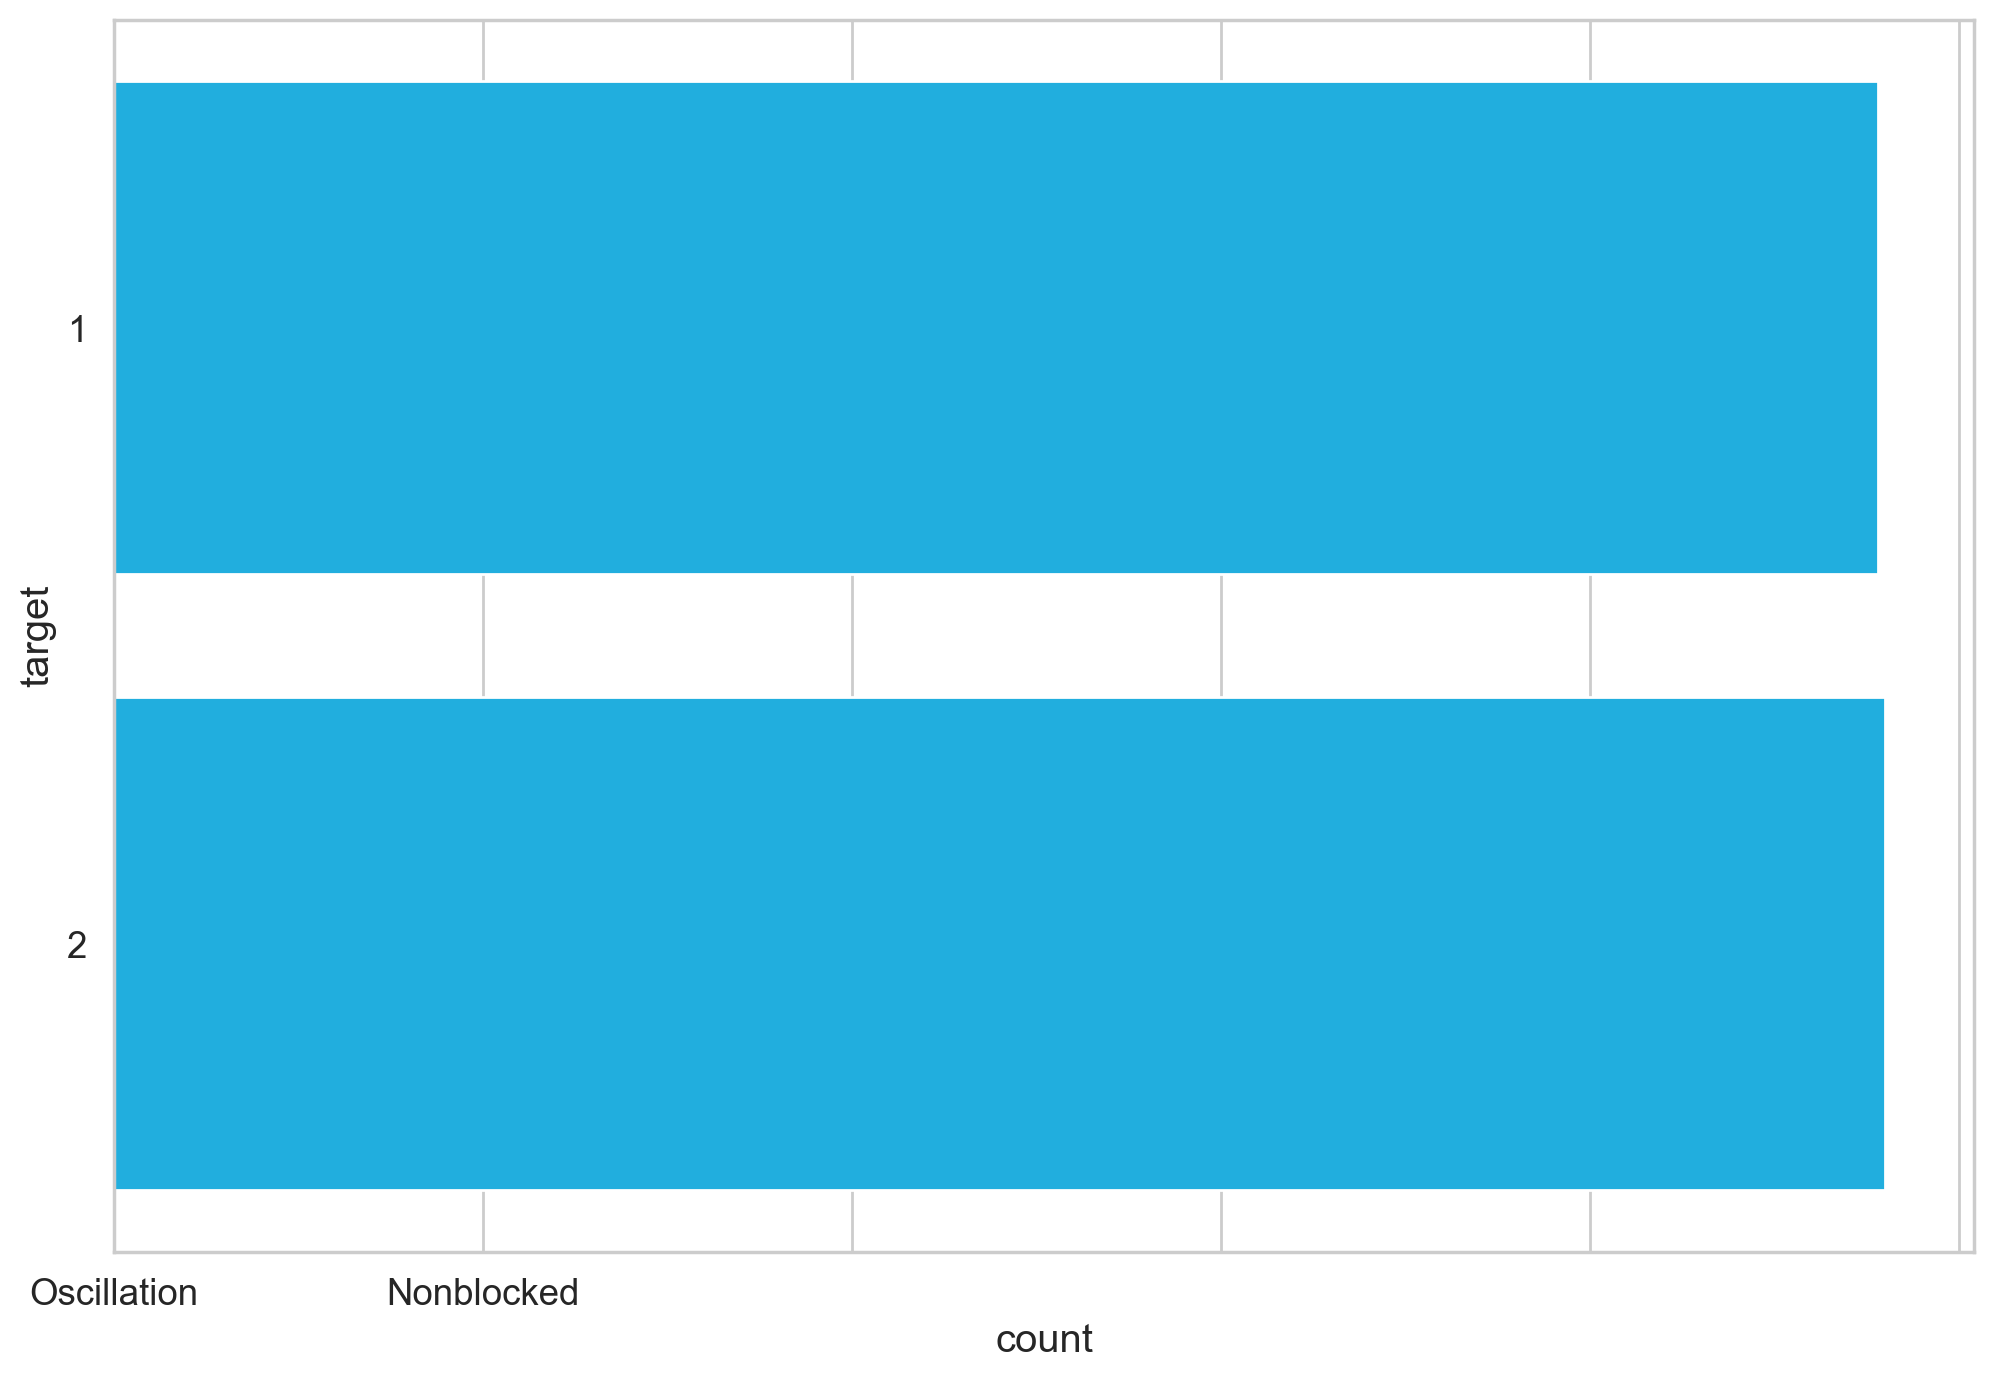

In [87]:
ax = sns.countplot(df.target)
ax.set_xticklabels(class_names);

# Time Series Class Plotting Function



In [88]:
def plot_time_series_class(data, class_name, ax, n_steps=10):
  time_series_df = pd.DataFrame(data)

  smooth_path = time_series_df.rolling(n_steps).mean()
  path_deviation = 2 * time_series_df.rolling(n_steps).std()

  under_line = (smooth_path - path_deviation)[0]
  over_line = (smooth_path + path_deviation)[0]

  ax.plot(smooth_path, linewidth=2)
  ax.fill_between(
    path_deviation.index,
    under_line,
    over_line,
    alpha=.125
  )
  ax.set_title(class_name)

In [89]:
df[df.target == str(CLASS_OSCILLATION)] \
 .drop(labels='target', axis=1)\
 .mean(axis=0).shape

(1500,)

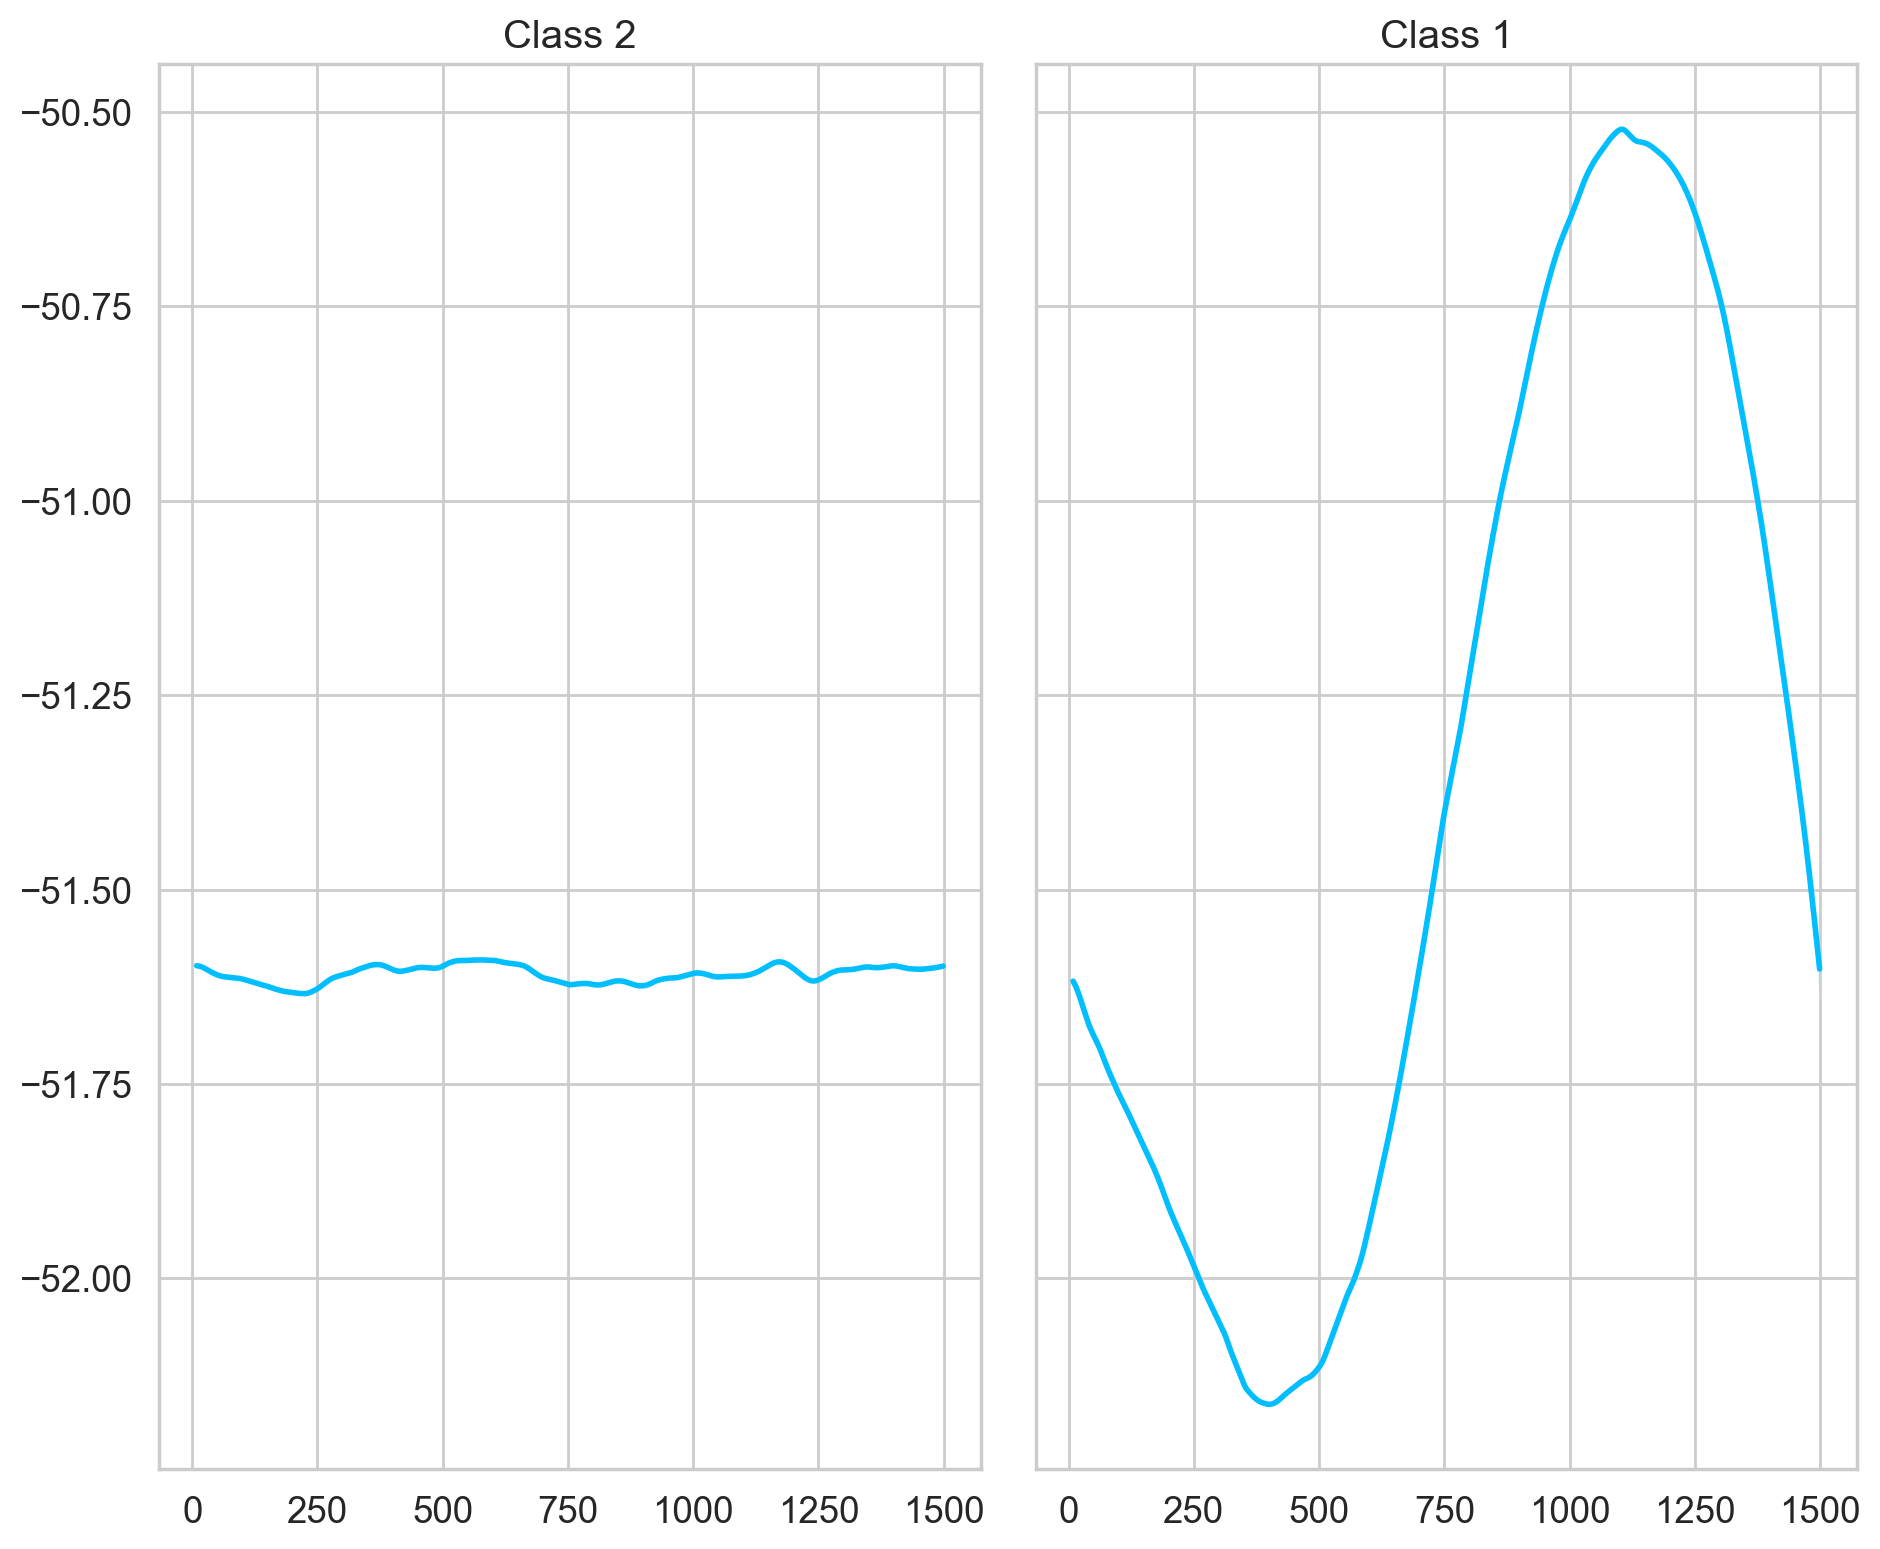

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out rows with NaN in the 'target' column
df_filtered = df[df.target.notna()]

# Get unique classes, excluding NaN
classes = df_filtered.target.unique()

# Define class names
class_names_mapping = {1: "Oscillation", 2: "Non-blocked"}
class_names = [class_names_mapping.get(cls, f"Class {cls}") for cls in classes]

# Calculate grid size
ncols = 3
nrows = len(classes) // ncols + (len(classes) % ncols > 0)

# Create subplots
fig, axs = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    sharey=True,
    figsize=(14, 8)
)

# Flatten axes for easy access
axs = axs.flat

# Plot each class with updated names
for i, cls in enumerate(classes):
    ax = axs[i]
    data = df_filtered[df_filtered.target == cls] \
        .drop(labels='target', axis=1) \
        .mean(axis=0) \
        .to_numpy()
    class_name = class_names_mapping.get(cls, f"Class {cls}")  # Get the correct class name
    plot_time_series_class(data, class_name, ax)               # Plot data
    ax.set_title(class_name)                                   # Set the title directly here

# Remove unused subplots
for i in range(len(classes), len(axs)):
    fig.delaxes(axs[i])

# Adjust layout
fig.tight_layout()


In [91]:
print(f"Number of classes: {len(classes)}, Number of class_names: {len(class_names)}")
print(f"Classes: {classes}")
print(f"Class Names: {class_names}")
for i, cls in enumerate(classes):
    print(f"Plotting class {cls} at subplot index {i}")

Number of classes: 2, Number of class_names: 2
Classes: ['2', '1']
Categories (2, object): ['1', '2']
Class Names: ['Class 2', 'Class 1']
Plotting class 2 at subplot index 0
Plotting class 1 at subplot index 1


In [92]:
oscillation_df = df[df.target == str(CLASS_OSCILLATION)].drop(labels='target', axis=1)

In [93]:
oscillation_df.shape

(239, 1500)

In [94]:
nonblocked_df = df[df.target != str(CLASS_OSCILLATION)].drop(labels='target', axis=1)

In [95]:
nonblocked_df.shape

(241, 1500)

# Dataset Splitting



In [96]:
train_df, val_df = train_test_split(
  oscillation_df,
  test_size=0.15,
  random_state=RANDOM_SEED
)

val_df, test_df = train_test_split(
  val_df,
  test_size=0.33, 
  random_state=RANDOM_SEED
)

# Creating Dataset for PyTorch 


In [97]:
def create_dataset(df):

  sequences = df.astype(np.float32).to_numpy().tolist()

  dataset = [torch.tensor(s).unsqueeze(1).float() for s in sequences]

  n_seq, seq_len, n_features = torch.stack(dataset).shape

  return dataset, seq_len, n_features

In [98]:
train_dataset, seq_len, n_features = create_dataset(train_df)
val_dataset, _, _ = create_dataset(val_df)
test_oscillation_dataset, _, _ = create_dataset(test_df)
test_nonblocked_dataset, _, _ = create_dataset(nonblocked_df)

## Model Definition
# Encoder


In [99]:
class Encoder(nn.Module):

  def __init__(self, seq_len, n_features, embedding_dim=64):
    super(Encoder, self).__init__()

    self.seq_len, self.n_features = seq_len, n_features
    self.embedding_dim, self.hidden_dim = embedding_dim, 2 * embedding_dim

    self.rnn1 = nn.LSTM(
      input_size=n_features,
      hidden_size=self.hidden_dim,
      num_layers=1,
      batch_first=True
    )
    
    self.rnn2 = nn.LSTM(
      input_size=self.hidden_dim,
      hidden_size=embedding_dim,
      num_layers=1,
      batch_first=True
    )

  def forward(self, x):
    x = x.reshape((1, self.seq_len, self.n_features))

    x, (_, _) = self.rnn1(x)
    x, (hidden_n, _) = self.rnn2(x)

    return hidden_n.reshape((self.n_features, self.embedding_dim))
     

# Decoder


In [100]:
class Decoder(nn.Module):

  def __init__(self, seq_len, input_dim=64, n_features=1):
    super(Decoder, self).__init__()

    self.seq_len, self.input_dim = seq_len, input_dim
    self.hidden_dim, self.n_features = 2 * input_dim, n_features

    self.rnn1 = nn.LSTM(
      input_size=input_dim,
      hidden_size=input_dim,
      num_layers=1,
      batch_first=True
    )

    self.rnn2 = nn.LSTM(
      input_size=input_dim,
      hidden_size=self.hidden_dim,
      num_layers=1,
      batch_first=True
    )

    self.output_layer = nn.Linear(self.hidden_dim, n_features)

  def forward(self, x):
    x = x.repeat(self.seq_len, self.n_features)
    x = x.reshape((self.n_features, self.seq_len, self.input_dim))

    x, (hidden_n, cell_n) = self.rnn1(x)
    x, (hidden_n, cell_n) = self.rnn2(x)
    x = x.reshape((self.seq_len, self.hidden_dim))

    return self.output_layer(x)
     

# Recurrent Autoencoder


In [101]:
class RecurrentAutoencoder(nn.Module):

  def __init__(self, seq_len, n_features, embedding_dim=64):
    super(RecurrentAutoencoder, self).__init__()

    self.encoder = Encoder(seq_len, n_features, embedding_dim).to(device)
    self.decoder = Decoder(seq_len, embedding_dim, n_features).to(device)

  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)

    return x

In [102]:
model = RecurrentAutoencoder(seq_len, n_features, 128)
model = model.to(device)

# Training Function


In [103]:
def train_model(model, train_dataset, val_dataset, n_epochs):
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
  criterion = nn.L1Loss(reduction='sum').to(device)
  history = dict(train=[], val=[])

  best_model_wts = copy.deepcopy(model.state_dict())
  best_loss = 10000.0
  
  for epoch in range(1, n_epochs + 1):
    model = model.train()

    train_losses = []
    for seq_true in train_dataset:
      optimizer.zero_grad()

      seq_true = seq_true.to(device)
      seq_pred = model(seq_true)

      loss = criterion(seq_pred, seq_true)

      loss.backward()
      optimizer.step()

      train_losses.append(loss.item())

    val_losses = []
    model = model.eval()
    with torch.no_grad():
      for seq_true in val_dataset:

        seq_true = seq_true.to(device)
        seq_pred = model(seq_true)

        loss = criterion(seq_pred, seq_true)
        val_losses.append(loss.item())

    train_loss = np.mean(train_losses)
    val_loss = np.mean(val_losses)

    history['train'].append(train_loss)
    history['val'].append(val_loss)

    if val_loss < best_loss:
      best_loss = val_loss
      best_model_wts = copy.deepcopy(model.state_dict())

    print(f'Epoch {epoch}: train loss {train_loss} val loss {val_loss}')

  model.load_state_dict(best_model_wts)
  return model.eval(), history

In [104]:
model, history = train_model(
  model, 
  train_dataset, 
  val_dataset, 
  n_epochs=10
)

Epoch 1: train loss 28916.739498345134 val loss 1562.761863708496
Epoch 2: train loss 2263.7598768713437 val loss 1551.8628311157227
Epoch 3: train loss 2261.654037701085 val loss 1546.0644505818684
Epoch 4: train loss 2260.929618647533 val loss 1542.828795115153
Epoch 5: train loss 2260.627437196929 val loss 1541.0222714742024
Epoch 6: train loss 2260.3900759842595 val loss 1539.8773015340169
Epoch 7: train loss 2260.23379952567 val loss 1538.9925053914387
Epoch 8: train loss 2260.081526732797 val loss 1538.3451855977376
Epoch 9: train loss 2260.3646560443444 val loss 1538.034388224284
Epoch 10: train loss 2260.002059861357 val loss 1537.68404006958


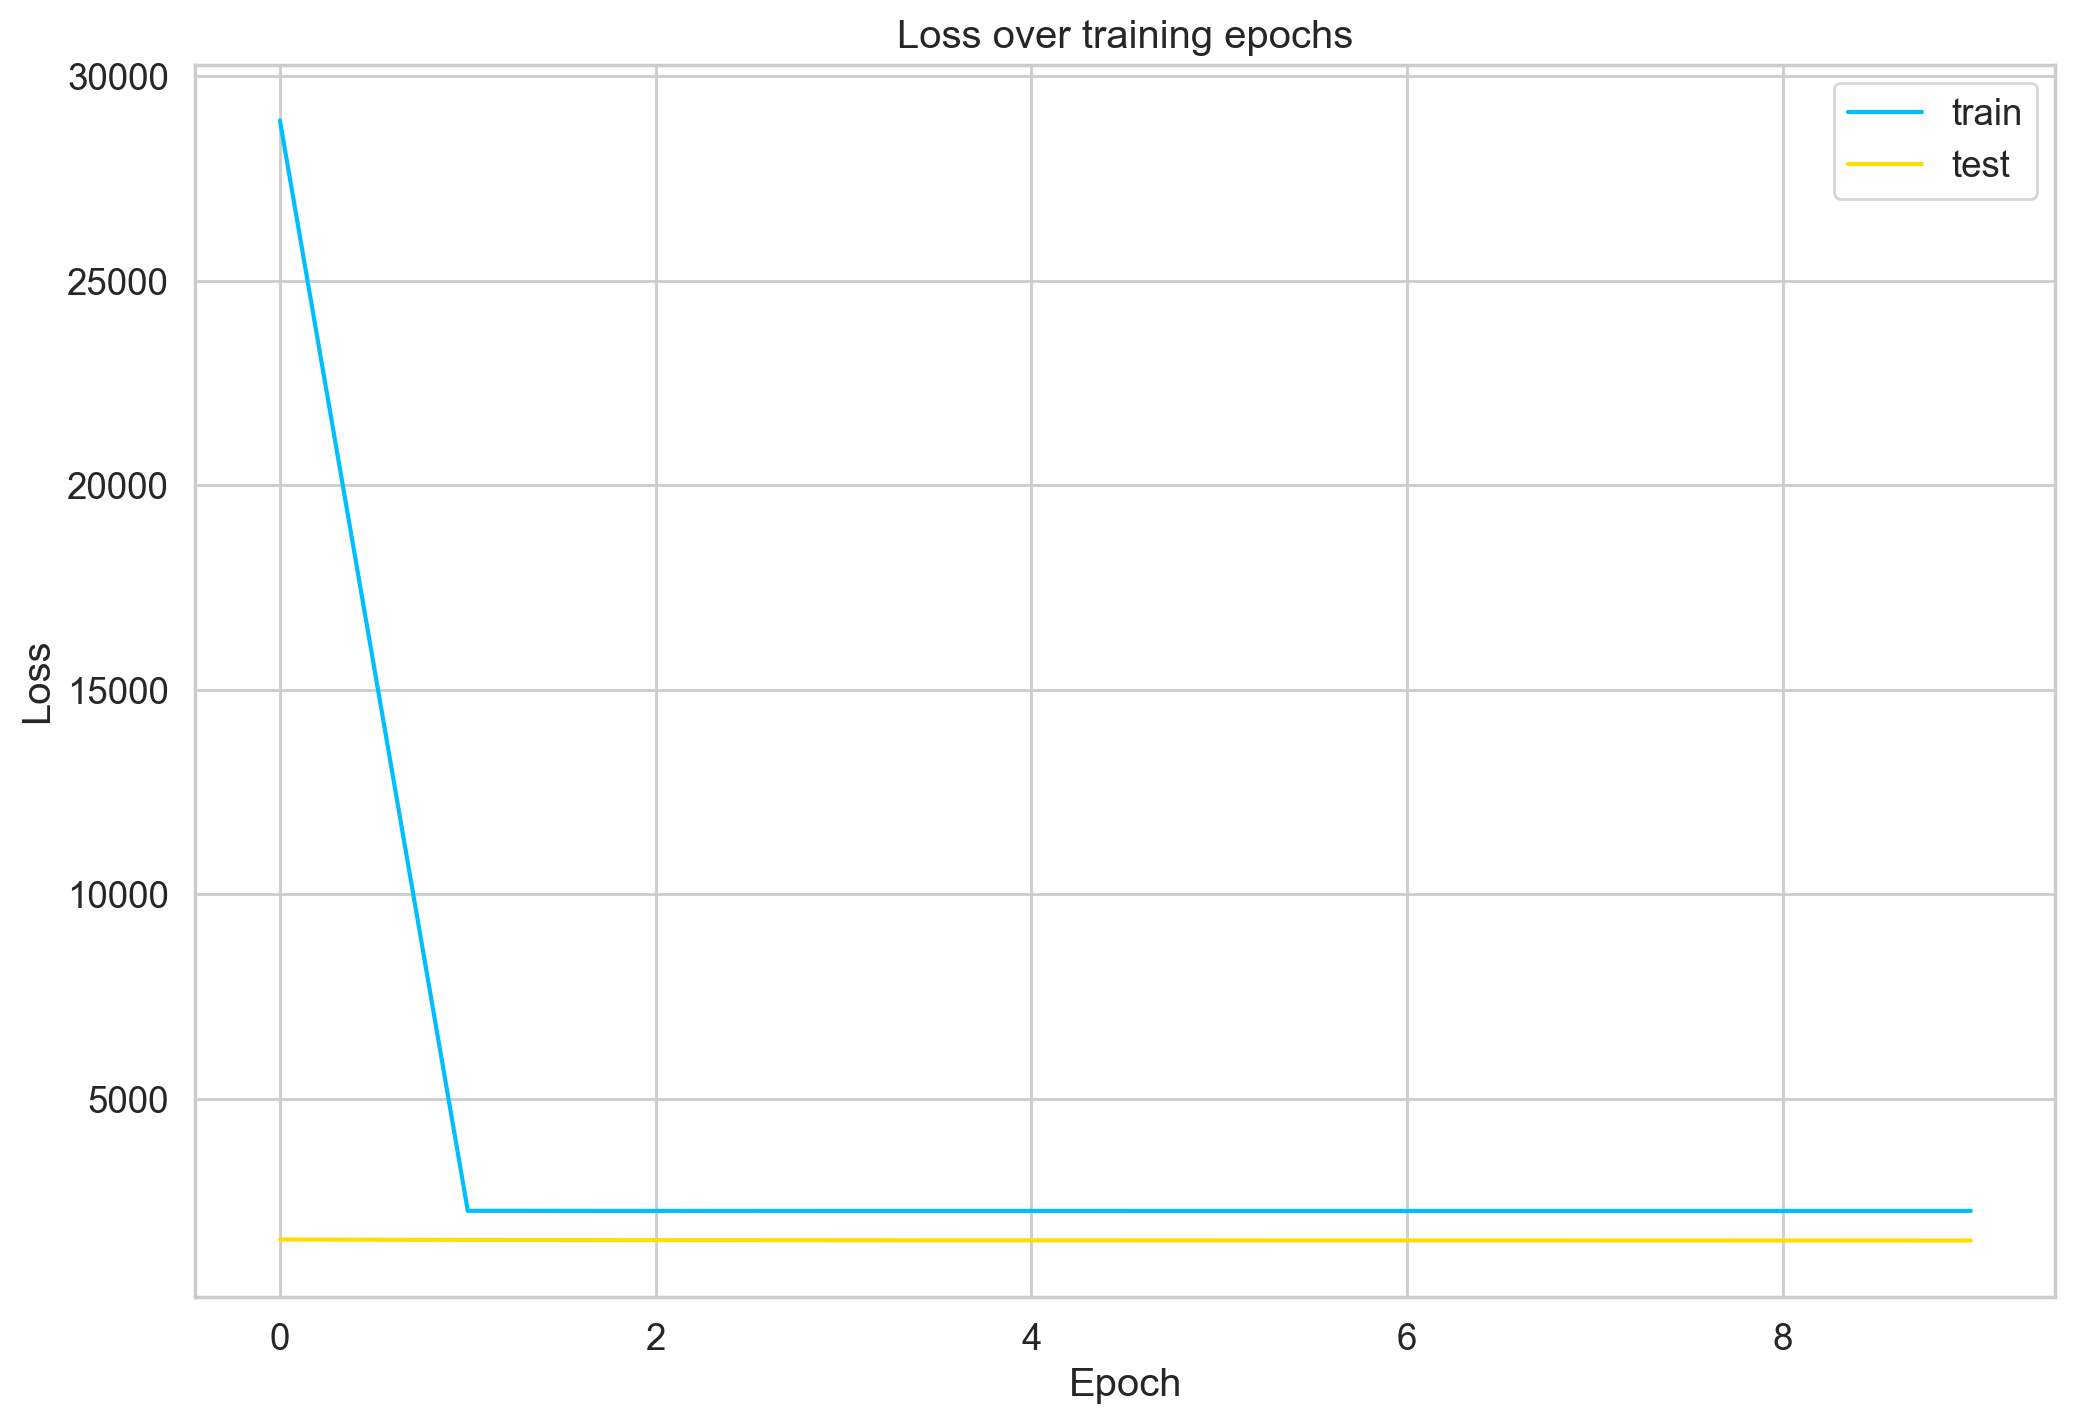

In [105]:
ax = plt.figure().gca()

ax.plot(history['train'])
ax.plot(history['val'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.title('Loss over training epochs')
plt.show();

In [106]:
#Saves the trained model to a file.

MODEL_PATH = 'output2ndshuffle7030.pth'

torch.save(model, MODEL_PATH)

In [107]:
# Defines a predict function to evaluate the model on a given dataset. It computes the loss for each sequence in the dataset.
def predict(model, dataset):
  predictions, losses = [], []
  criterion = nn.L1Loss(reduction='sum').to(device)
  with torch.no_grad():
    model = model.eval()
    for seq_true in dataset:
      seq_true = seq_true.to(device)
      seq_pred = model(seq_true)

      loss = criterion(seq_pred, seq_true)

      predictions.append(seq_pred.cpu().numpy().flatten())
      losses.append(loss.item())
  return predictions, losses

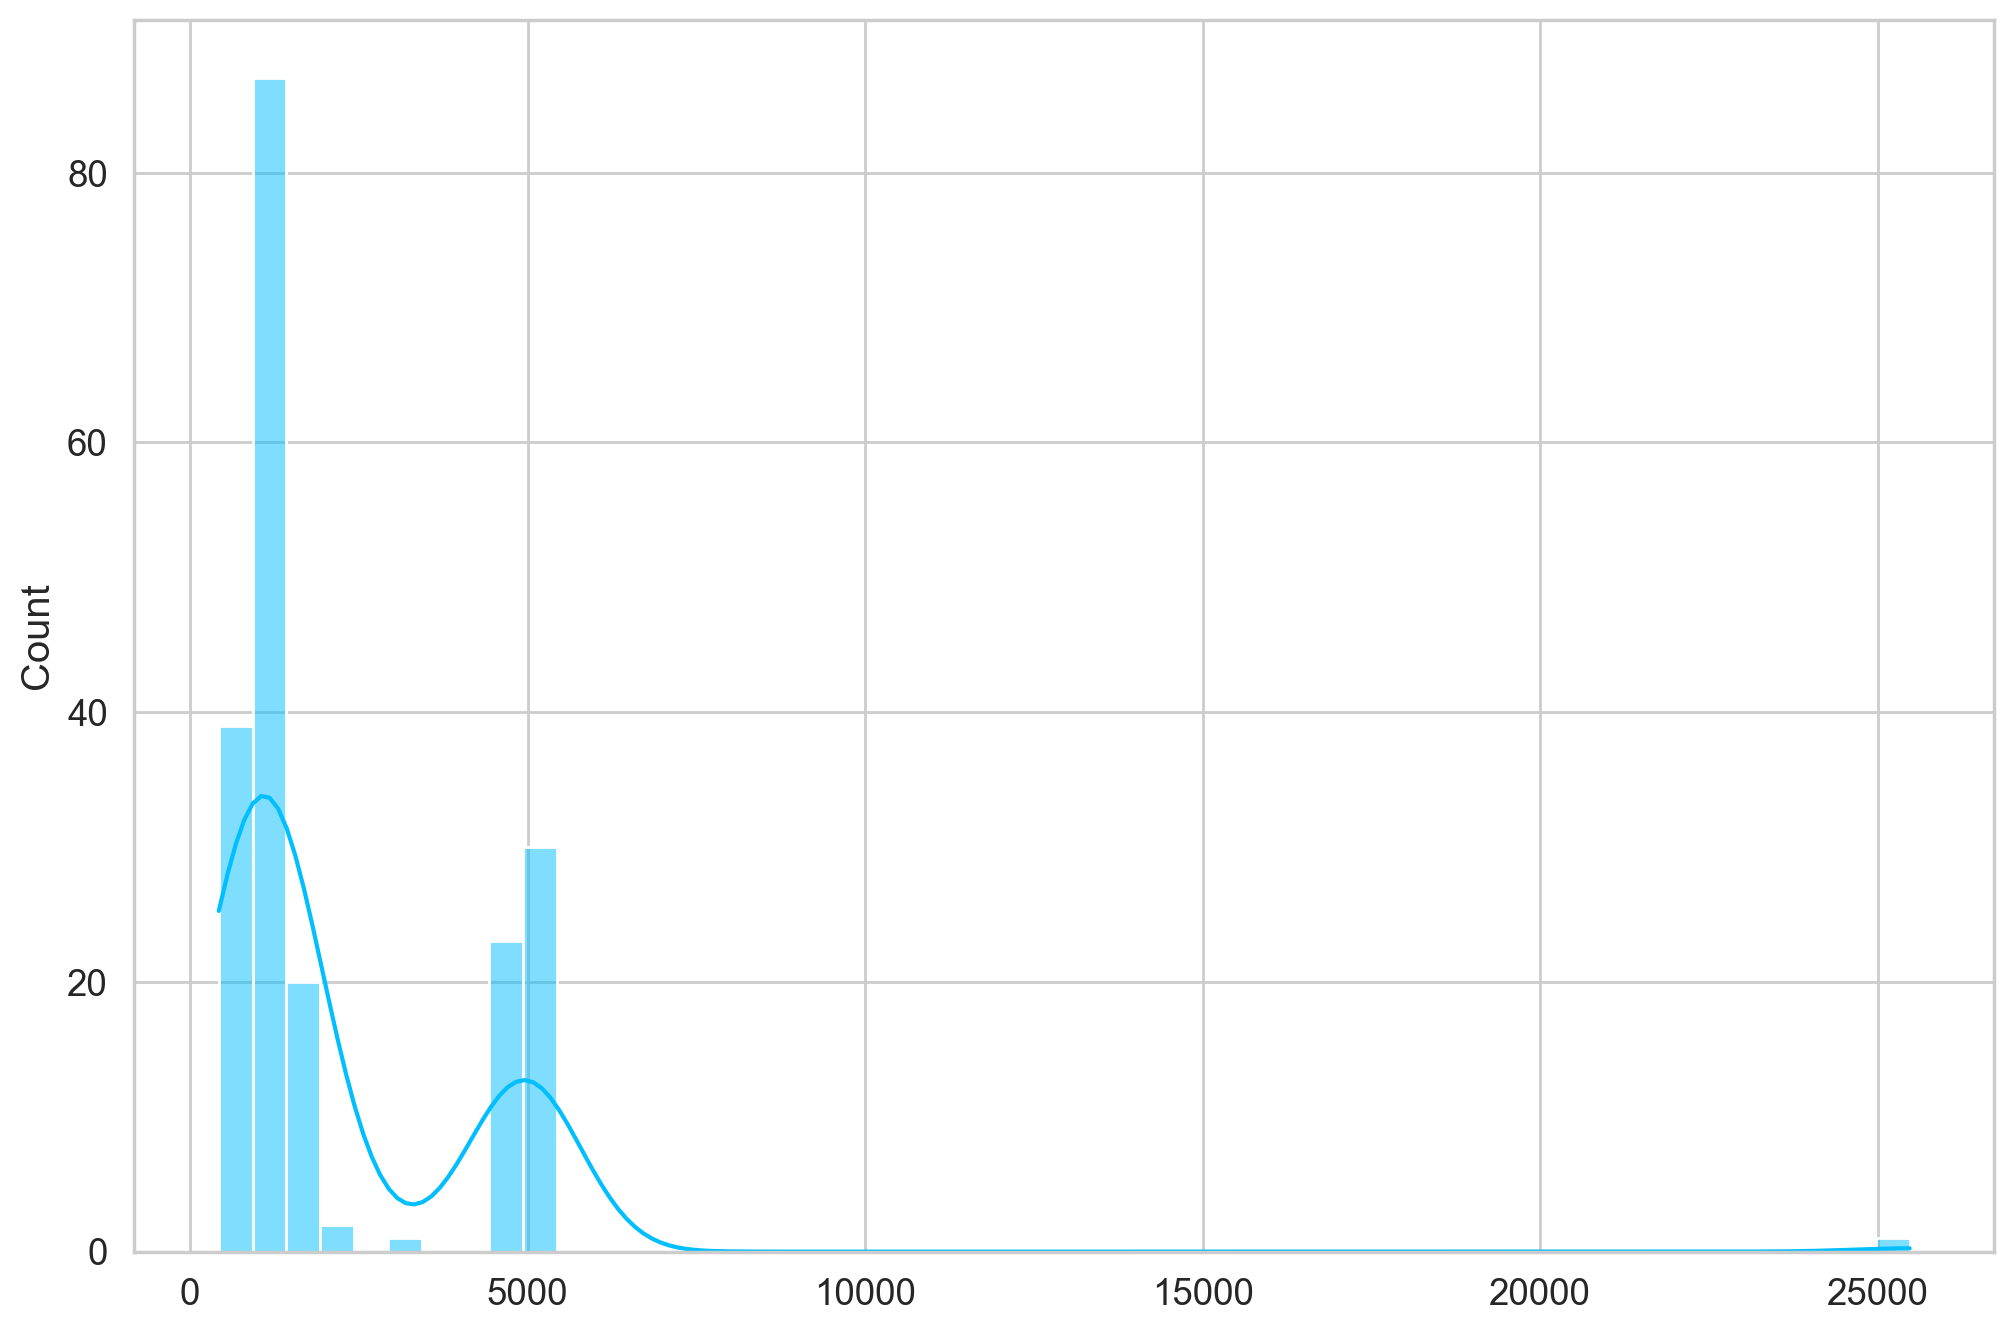

In [108]:
#Computes and plots the distribution of reconstruction losses for the training dataset using a histogram.

_, losses = predict(model, train_dataset)

sns.histplot(losses, bins=50, kde=True);

## Anomaly Detection

In [109]:
#Sets a threshold for detecting anomalies. Any loss above this value is considered an anomaly.
THRESHOLD = 2500

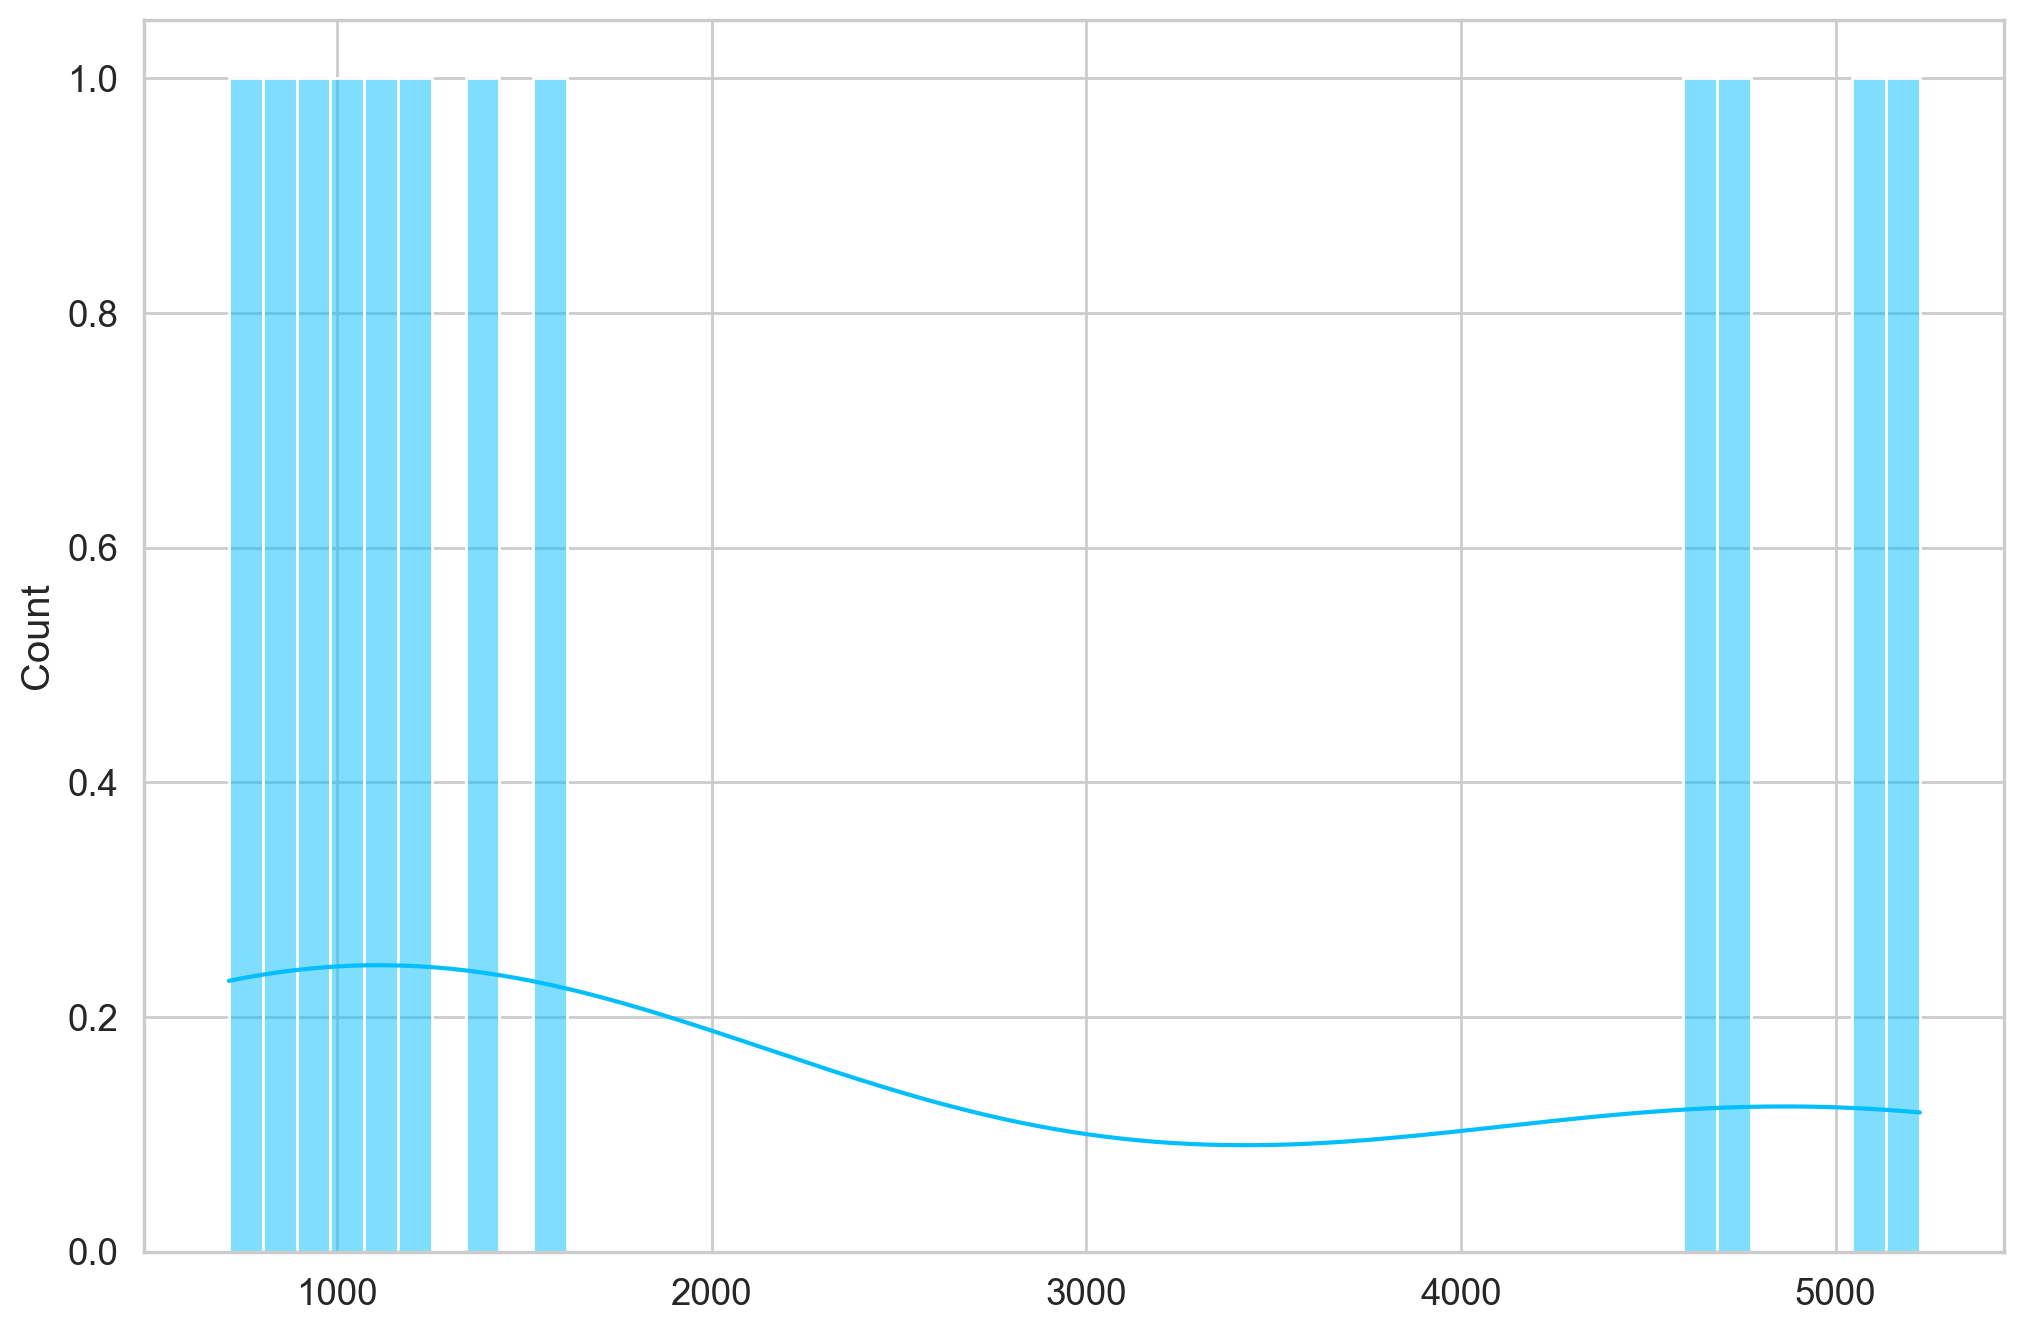

In [110]:
#Predicts the losses for the oscillation test dataset and plots their distribution.

predictions, pred_losses = predict(model, test_oscillation_dataset)
sns.histplot(pred_losses, bins=50, kde=True);

Counts how many oscillation sequences were correctly classified as normal (i.e., with losses below the threshold).

In [111]:
correct = sum(l <= THRESHOLD for l in pred_losses)
print(f'Correct normal predictions: {correct}/{len(test_oscillation_dataset)}')

Correct normal predictions: 8/12


In [112]:
#Repeats the process for the nonblocked dataset (anomalies).


nonblocked_dataset = test_nonblocked_dataset[:len(test_oscillation_dataset)]

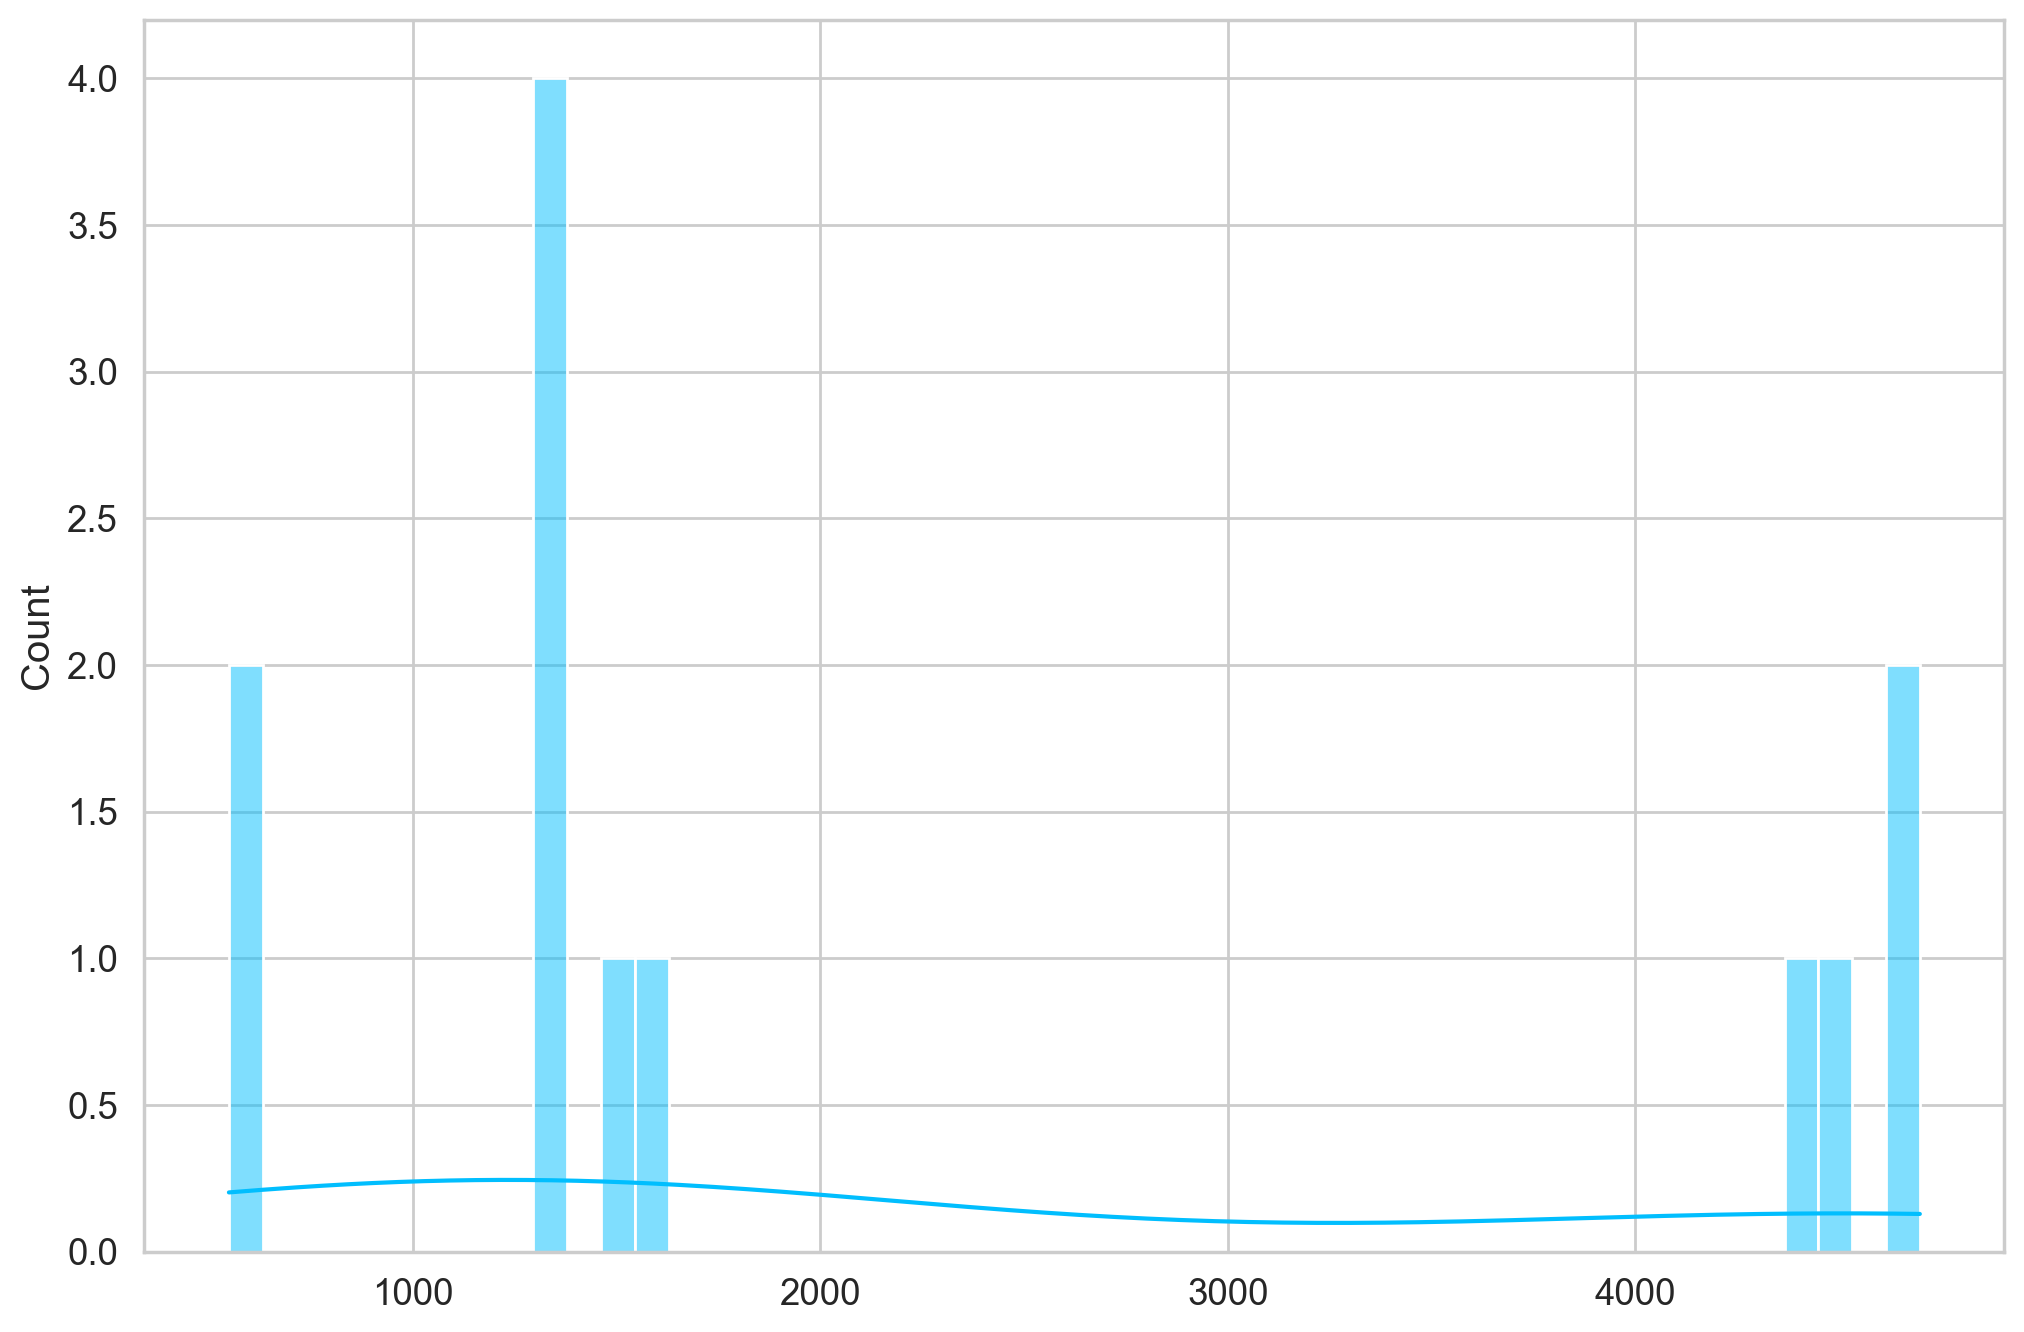

In [113]:
predictions, pred_losses = predict(model, nonblocked_dataset)
sns.histplot(pred_losses, bins=50, kde=True);

Counts how many nonblocked sequences were correctly classified as anomalies (losses above the threshold).

In [114]:
correct = sum(l > THRESHOLD for l in pred_losses)
print(f'Correct anomaly predictions: {correct}/{len(nonblocked_dataset)}')

Correct anomaly predictions: 4/12


# Plotting Predictions
This function plots the original time series data (data) and the reconstructed time series (predictions) from the model. It also shows the reconstruction loss in the plot title.

In [115]:
def plot_prediction(data, model, title, ax):
  predictions, pred_losses = predict(model, [data])

  ax.plot(data, label='true')
  ax.plot(predictions[0], label='reconstructed')
  ax.set_title(f'{title} (loss: {np.around(pred_losses[0], 2)})')
  ax.legend()

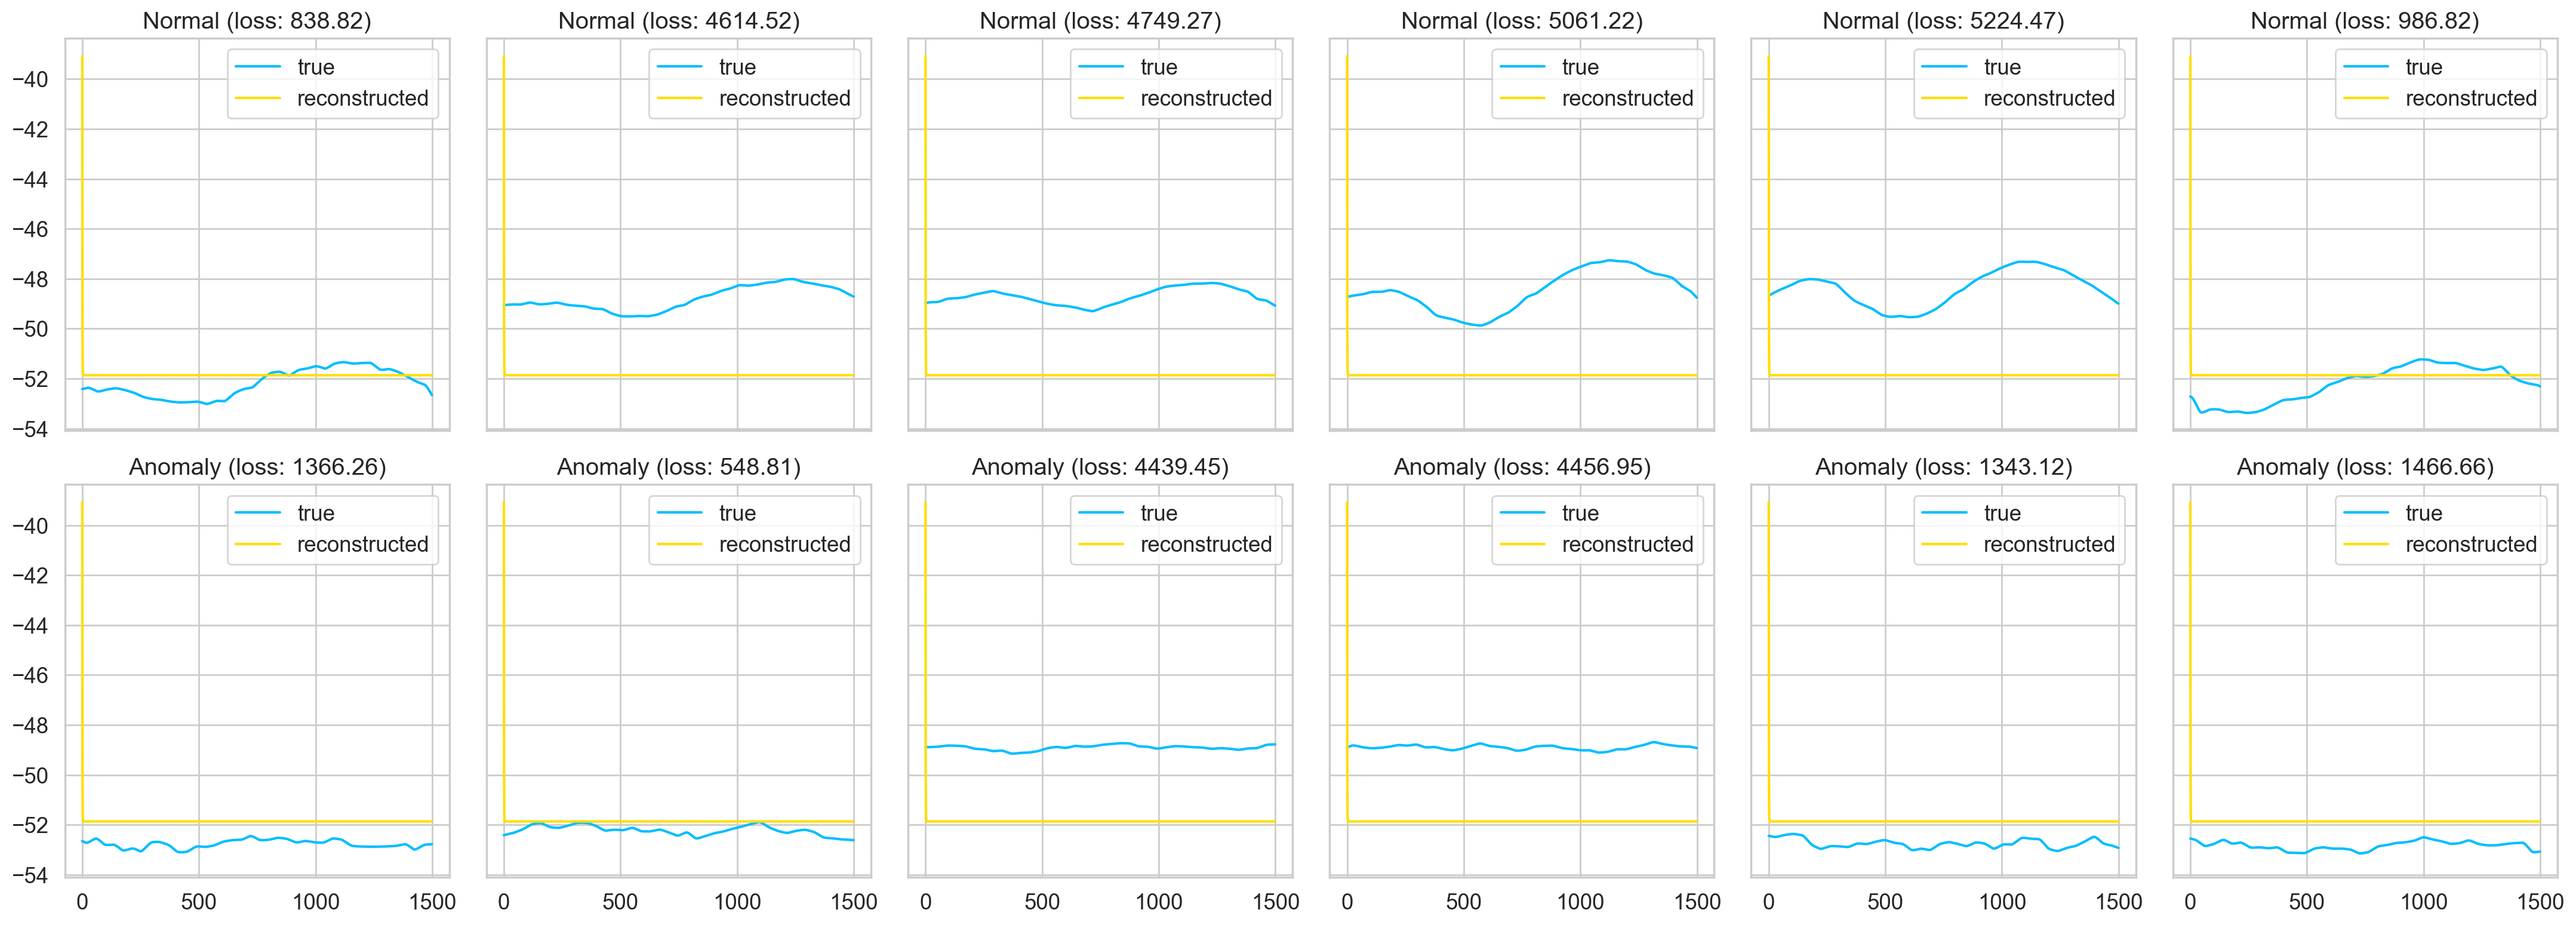

In [116]:
#This section plots the reconstructed predictions for 6 normal and 6 anomalous samples from the test datasets.
fig, axs = plt.subplots(
  nrows=2,
  ncols=6,
  sharey=True,
  sharex=True,
  figsize=(22, 8)
)

for i, data in enumerate(test_oscillation_dataset[:6]):
  plot_prediction(data, model, title='Normal', ax=axs[0, i])

for i, data in enumerate(test_nonblocked_dataset[:6]):
  plot_prediction(data, model, title='Anomaly', ax=axs[1, i])

fig.tight_layout();

In [117]:
# Threshold to decide normal (oscillation) and anomaly (nonblocked)
THRESHOLD = 2500

# Get predictions and losses for the test oscillation dataset (normal samples)
_, osc_losses = predict(model, test_oscillation_dataset)
osc_labels = [1 if loss <= THRESHOLD else 0 for loss in osc_losses]  # 1 = normal, 0 = anomaly
osc_true_labels = [1] * len(test_oscillation_dataset)  # All true labels are normal

# Get predictions and losses for the test nonblocked dataset (anomaly samples)
_, nonblocked_losses = predict(model, test_nonblocked_dataset)
nonblocked_labels = [1 if loss <= THRESHOLD else 0 for loss in nonblocked_losses]  # 1 = normal, 0 = anomaly
nonblocked_true_labels = [0] * len(test_nonblocked_dataset)  # All true labels are anomalies


In [118]:
# Combine true labels and predictions for overall accuracy calculation
all_true_labels = osc_true_labels + nonblocked_true_labels
all_predictions = osc_labels + nonblocked_labels
print(all_predictions)
print(all_true_labels)
predictions_length = len(all_predictions)
print(f"The total number of predictions is: {predictions_length}")
predictions_length2 = len(all_true_labels)
print(f"The total number of true labels is: {predictions_length2}")

[1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(all_true_labels, all_predictions)
precision = precision_score(all_true_labels, all_predictions)
recall = recall_score(all_true_labels, all_predictions)
f1 = f1_score(all_true_labels, all_predictions)
f1_v2 = f1_score(all_true_labels, all_predictions, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F1 Score (Macro Average): {f1_v2:.4f}")



Accuracy: 0.2688
Precision: 0.0423
Recall: 0.6667
F1 Score: 0.0796
F1 Score (Macro Average): 0.2365


In [120]:
osc_labels = [1 if loss <= THRESHOLD else 0 for loss in osc_losses]  # Predictions
osc_true_labels = [1] * len(test_oscillation_dataset)  # True labels
nonblocked_labels = [1 if loss <= THRESHOLD else 0 for loss in nonblocked_losses]  # Predictions
nonblocked_true_labels = [0] * len(test_nonblocked_dataset)  # True labels
all_predictions = osc_labels + nonblocked_labels
all_true_labels = osc_true_labels + nonblocked_true_labels

In [121]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(all_true_labels, all_predictions)
print("Confusion Matrix:")
print(cm)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(all_true_labels, all_predictions).ravel()

print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Compute metrics manually
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



Confusion Matrix:
[[ 60 181]
 [  4   8]]
True Negatives (TN): 60
False Positives (FP): 181
False Negatives (FN): 4
True Positives (TP): 8
Accuracy: 0.2688
Precision: 0.0423
Recall: 0.6667
F1 Score: 0.0796


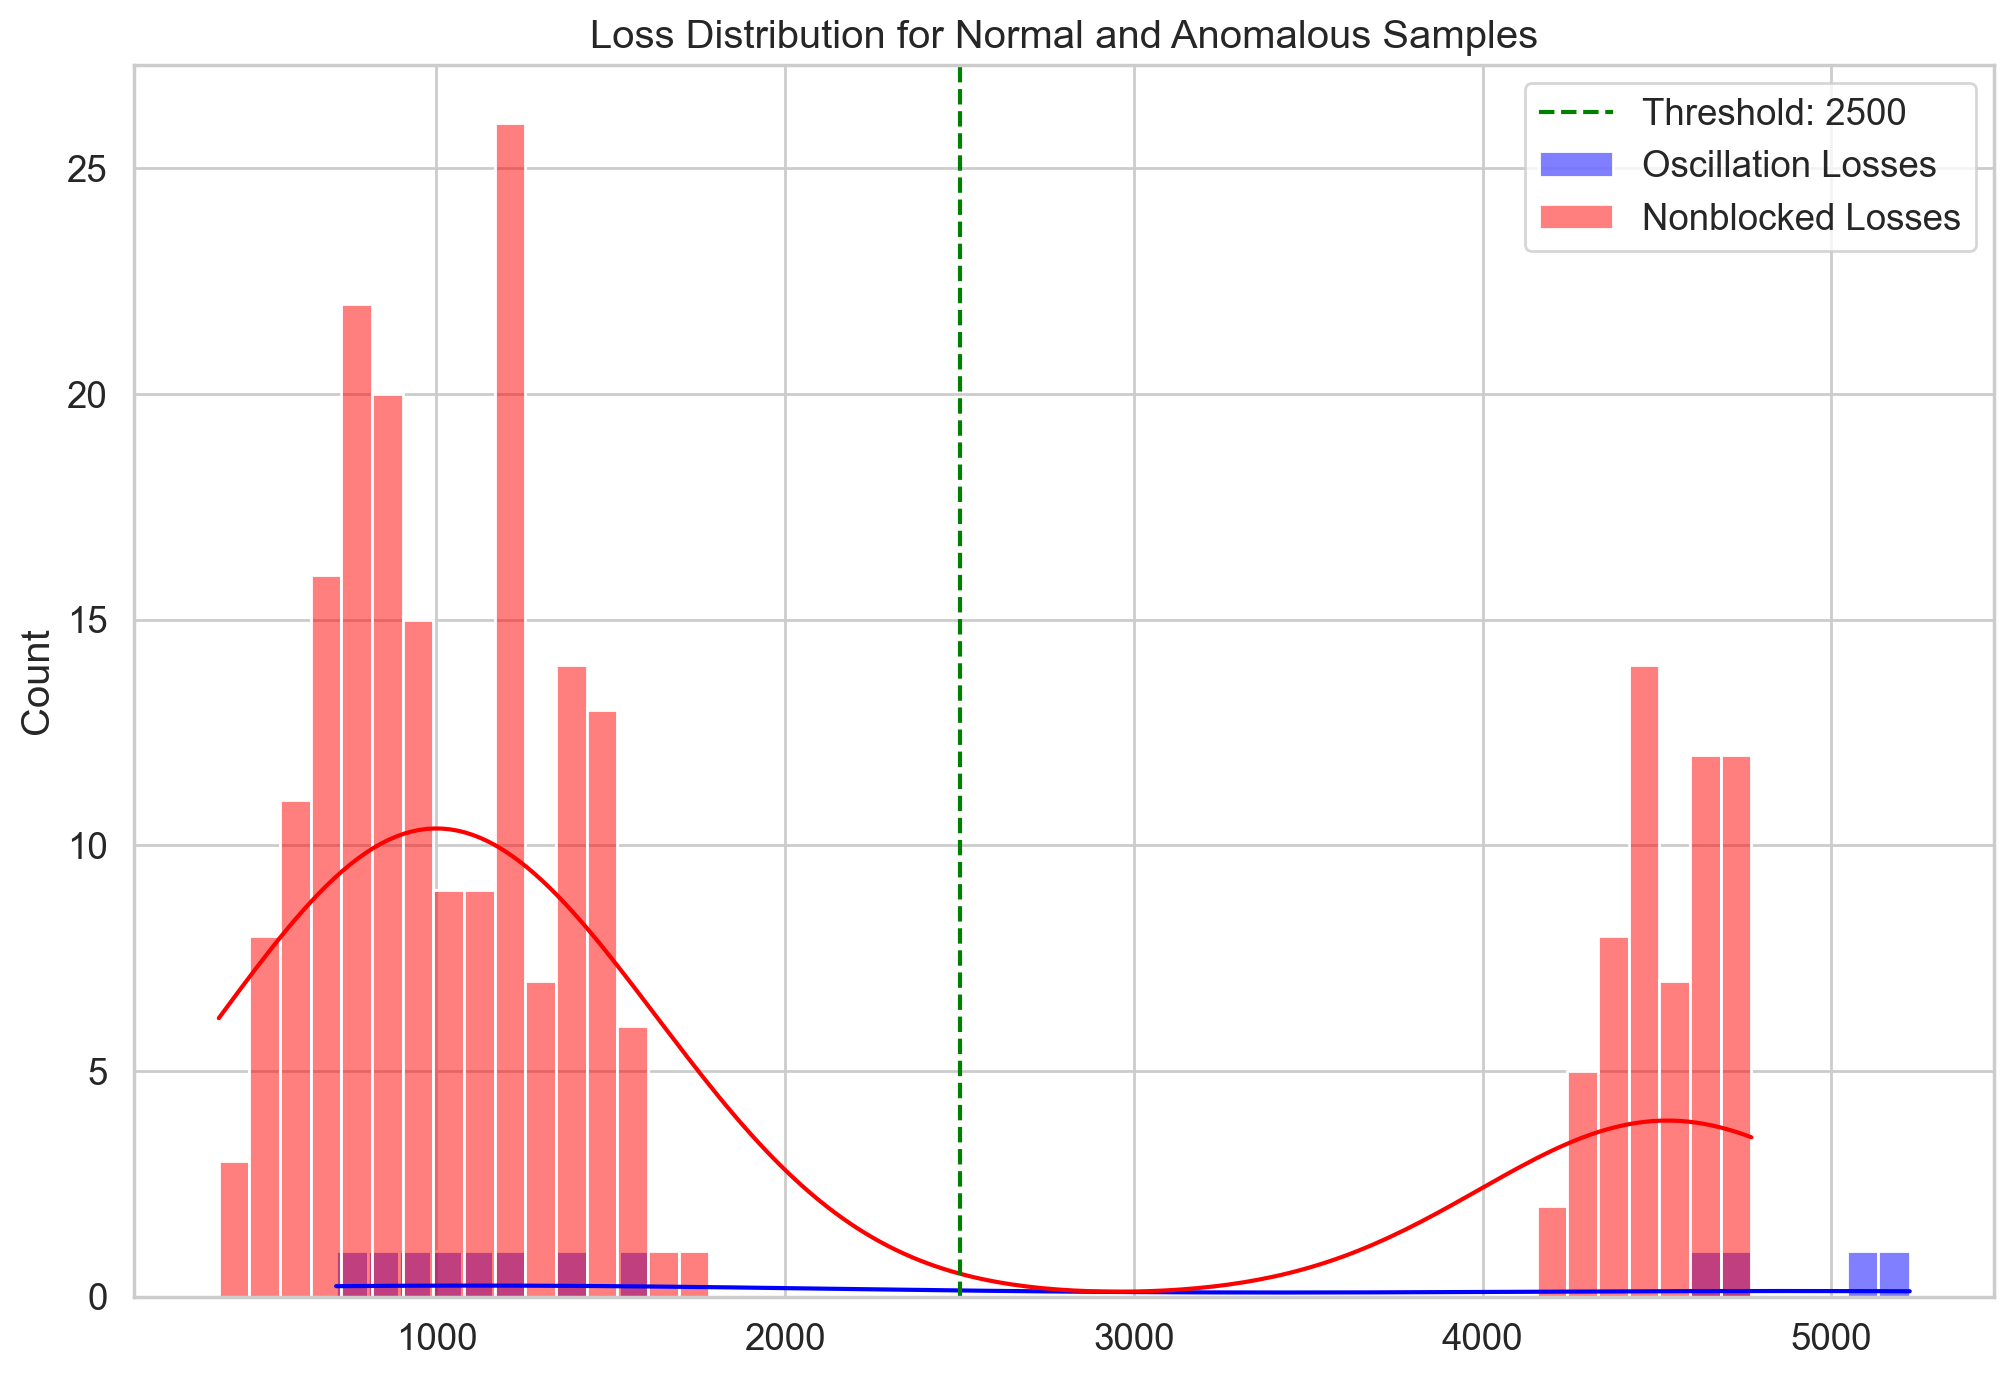

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot oscillation (normal) losses
sns.histplot(osc_losses, bins=50, kde=True, label="Oscillation Losses", color="blue")
# Plot nonblocked (anomaly) losses
sns.histplot(nonblocked_losses, bins=50, kde=True, label="Nonblocked Losses", color="red")
plt.axvline(x=THRESHOLD, color='green', linestyle='--', label=f"Threshold: {THRESHOLD}")
plt.legend()
plt.title("Loss Distribution for Normal and Anomalous Samples")
plt.show()


In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define thresholds to evaluate
threshold_values = [800, 1000, 1200, 1400, 1600 ,1800 ,2000 ,2200 ,2400]
accuracy_list = []  # To store accuracy values for the final plot

# Loop through each threshold
for THRESHOLD in threshold_values:
    # Generate predictions for current threshold
    osc_labels = [1 if loss <= THRESHOLD else 0 for loss in osc_losses]  # Predictions
    osc_true_labels = [1] * len(test_oscillation_dataset)  # True labels
    nonblocked_labels = [1 if loss <= THRESHOLD else 0 for loss in nonblocked_losses]  # Predictions
    nonblocked_true_labels = [0] * len(test_nonblocked_dataset)  # True labels
    all_predictions = osc_labels + nonblocked_labels
    all_true_labels = osc_true_labels + nonblocked_true_labels

    # Calculate confusion matrix and metrics
    tn, fp, fn, tp = confusion_matrix(all_true_labels, all_predictions).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    # Print metrics for debugging
    print(f"Threshold: {THRESHOLD}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

    # Store accuracy for plotting
    accuracy_list.append(accuracy)

    # Plot and save loss distribution for the current threshold
    plt.figure(figsize=(8, 6))
    sns.histplot(osc_losses, bins=50, kde=True, label="Oscillation Losses", color="blue")
    sns.histplot(nonblocked_losses, bins=50, kde=True, label="Nonblocked Losses", color="red")
    plt.axvline(x=THRESHOLD, color='green', linestyle='--', label=f"Threshold: {THRESHOLD}")
    plt.legend()
    plt.title(f"Loss Distribution for Threshold: {THRESHOLD}")
    plt.savefig(f"loss_distribution_{THRESHOLD}.png")  # Save the graph for this threshold
    plt.close()  # Close the plot to avoid overlapping in the loop

print("Loss distribution graphs saved for all thresholds.")


Threshold: 800
Accuracy: 0.7312, Precision: 0.0172, Recall: 0.0833, F1 Score: 0.0286
Threshold: 1000
Accuracy: 0.5850, Precision: 0.0396, Recall: 0.3333, F1 Score: 0.0708
Threshold: 1200
Accuracy: 0.5059, Precision: 0.0407, Recall: 0.4167, F1 Score: 0.0741
Threshold: 1400
Accuracy: 0.3636, Precision: 0.0429, Recall: 0.5833, F1 Score: 0.0800
Threshold: 1600
Accuracy: 0.2806, Precision: 0.0430, Recall: 0.6667, F1 Score: 0.0808
Threshold: 1800
Accuracy: 0.2688, Precision: 0.0423, Recall: 0.6667, F1 Score: 0.0796
Threshold: 2000
Accuracy: 0.2688, Precision: 0.0423, Recall: 0.6667, F1 Score: 0.0796
Threshold: 2200
Accuracy: 0.2688, Precision: 0.0423, Recall: 0.6667, F1 Score: 0.0796
Threshold: 2400
Accuracy: 0.2688, Precision: 0.0423, Recall: 0.6667, F1 Score: 0.0796
Loss distribution graphs saved for all thresholds.


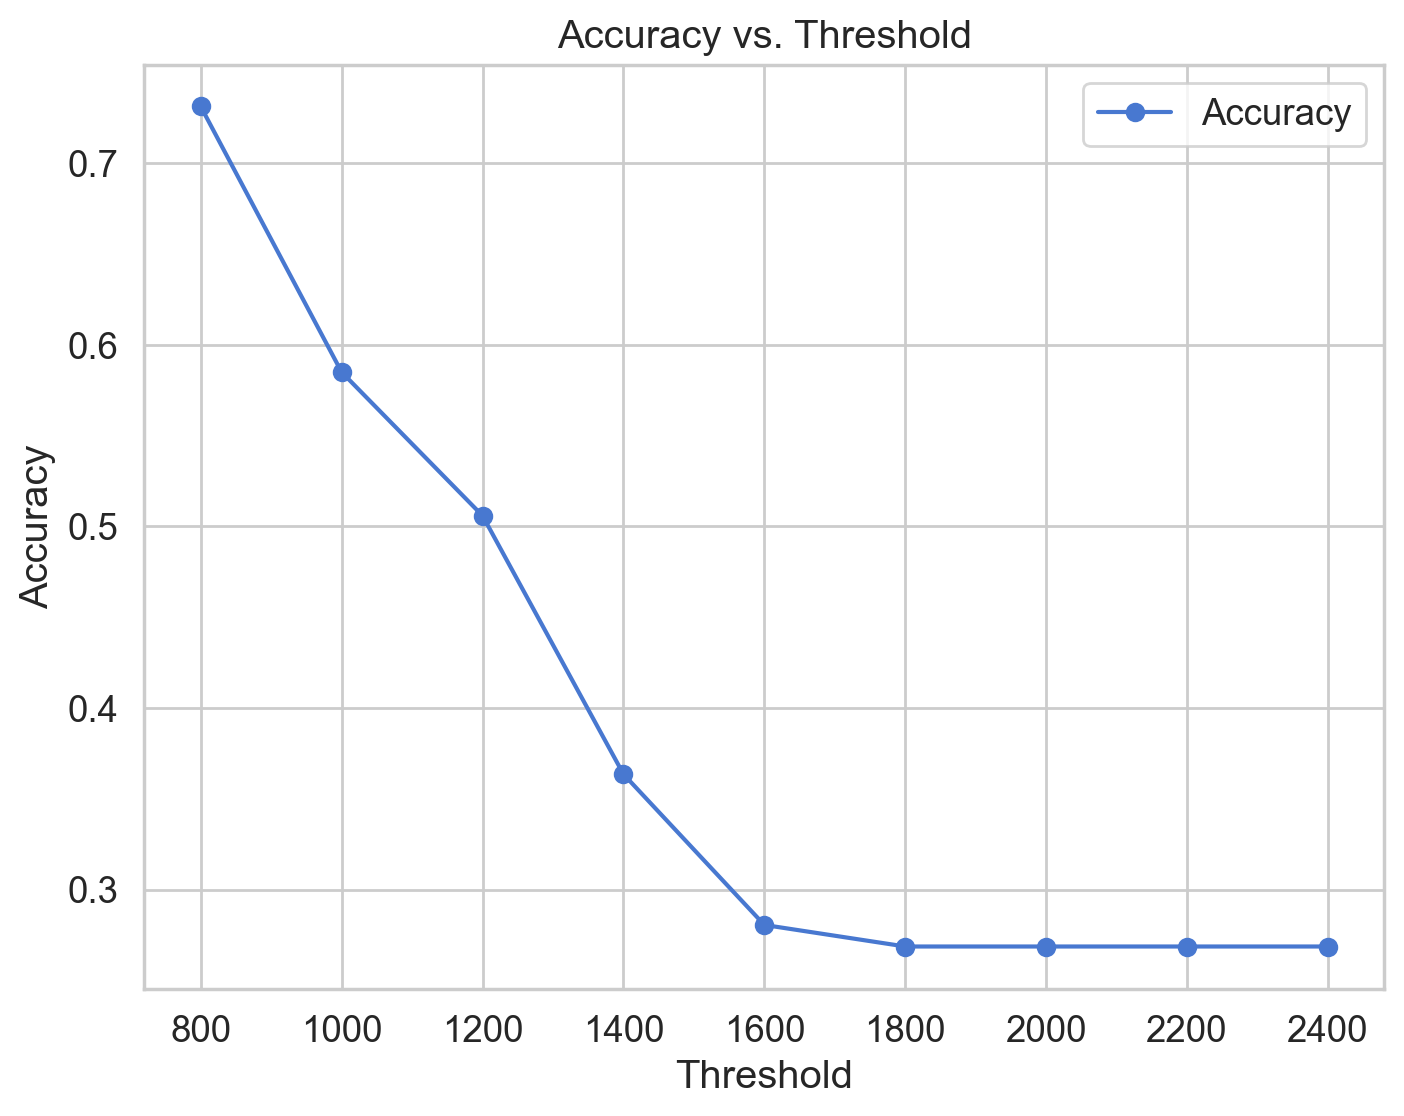

In [124]:
# Plot accuracy vs. threshold
plt.figure(figsize=(8, 6))
plt.plot(threshold_values, accuracy_list, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title("Accuracy vs. Threshold")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.xticks(threshold_values)
plt.grid(True)
plt.legend()
plt.savefig("accuracy_vs_threshold.png")  # Save the accuracy graph
plt.show()
